# 909. Snakes and Ladders

You are given an n x n integer matrix board where the cells are labeled from 1 to n2 in a Boustrophedon style starting from the bottom left of the board (i.e. board[n - 1][0]) and alternating direction each row.

You start on square 1 of the board. In each move, starting from square curr, do the following:

Choose a destination square next with a label in the range [curr + 1, min(curr + 6, n2)].
This choice simulates the result of a standard 6-sided die roll: i.e., there are always at most 6 destinations, regardless of the size of the board.
If next has a snake or ladder, you must move to the destination of that snake or ladder. Otherwise, you move to next.
The game ends when you reach the square n2.
A board square on row r and column c has a snake or ladder if board[r][c] != -1. The destination of that snake or ladder is board[r][c]. Squares 1 and n2 are not the starting points of any snake or ladder.

Note that you only take a snake or ladder at most once per dice roll. If the destination to a snake or ladder is the start of another snake or ladder, you do not follow the subsequent snake or ladder.

For example, suppose the board is [[-1,4],[-1,3]], and on the first move, your destination square is 2. You follow the ladder to square 3, but do not follow the subsequent ladder to 4.
Return the least number of dice rolls required to reach the square n2. If it is not possible to reach the square, return -1.

 

Example 1:

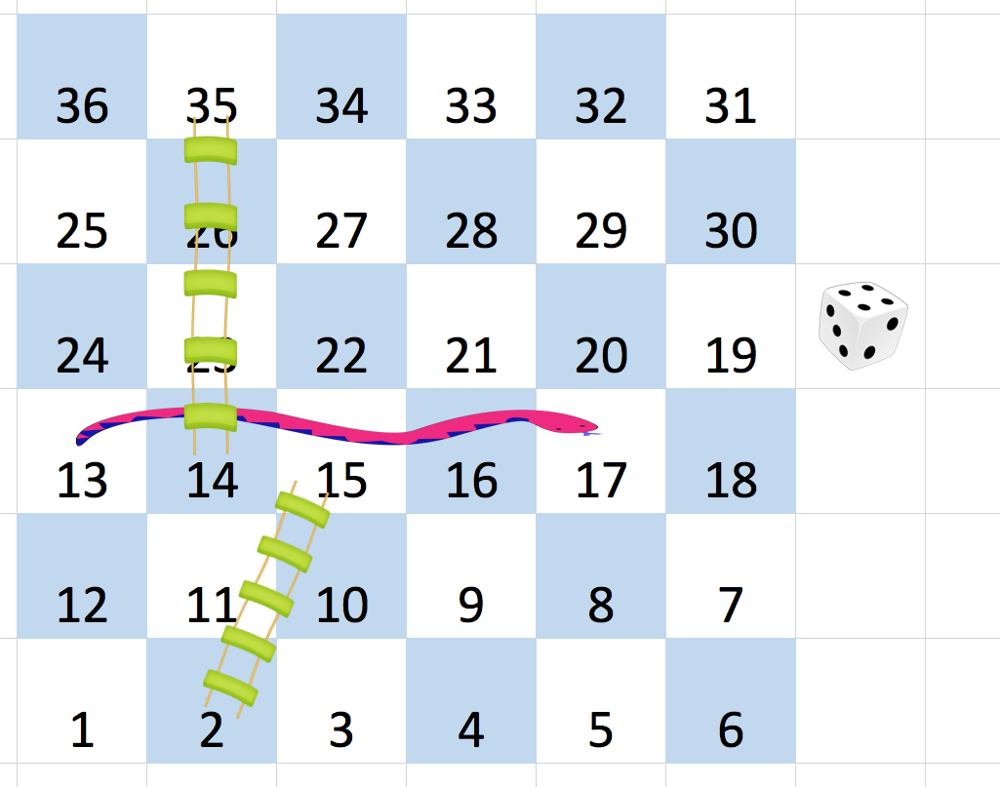

Input: board = [[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,35,-1,-1,13,-1],[-1,-1,-1,-1,-1,-1],[-1,15,-1,-1,-1,-1]]
Output: 4
Explanation: 
In the beginning, you start at square 1 (at row 5, column 0).
You decide to move to square 2 and must take the ladder to square 15.
You then decide to move to square 17 and must take the snake to square 13.
You then decide to move to square 14 and must take the ladder to square 35.
You then decide to move to square 36, ending the game.
This is the lowest possible number of moves to reach the last square, so return 4.
Example 2:

Input: board = [[-1,-1],[-1,3]]
Output: 1
 

Constraints:

n == board.length == board[i].length
2 <= n <= 20
board[i][j] is either -1 or in the range [1, n2].
The squares labeled 1 and n2 are not the starting points of any snake or ladder.

## Solution: BFS

In [1]:
from collections import deque

def minsteps_BFS(board):
    n = len(board)  # Size of the board (n x n)

    # Helper function to convert 1D position to 2D board coordinates
    def mapcoord(val):
        # Calculate row (board is numbered from bottom to top)
        row = n - 1 - (val - 1) // n
        
        # Calculate column based on row direction (left-to-right or right-to-left)
        if (n - 1 - row) % 2 == 0:
            col = (val - 1) % n
        else:
            col = n - 1 - (val - 1) % n
        return row, col

    # Track visited cells to avoid reprocessing
    visited = [[False] * n for _ in range(n)]
    
    # Initialize BFS queue with starting cell (1)
    q = deque()
    q.append(1)
    
    # Mark the first cell (bottom-left) as visited
    visited[n - 1][0] = True

    minsteps = 0  # Tracks number of dice throws (BFS levels)

    # Perform BFS to find shortest path to cell n*n
    while q:
        # Process all nodes (board positions) at the current BFS level
        for _ in range(len(q)):
            val = q.popleft()

            # If we reach the last cell, return the number of steps
            if val == n * n:
                return minsteps

            # Try all possible dice throws (1 to 6)
            for dicepoint in range(1, 7):
                next_val = val + dicepoint
                if next_val > n * n:
                    continue  # Skip if beyond board size

                row, col = mapcoord(next_val)  # Get coordinates of the target cell

                if visited[row][col]:
                    continue  # Skip already visited cells

                visited[row][col] = True  # Mark as visited

                # If cell has no snake or ladder
                if board[row][col] == -1:
                    q.append(next_val)
                else:
                    # Snake or ladder found — jump to the new value
                    q.append(board[row][col])
        
        minsteps += 1  # Increment step count after processing the level

    # If destination is unreachable (shouldn't happen in valid input)
    return -1

# Test call
minsteps_BFS(board=[[1,1,-1],[1,1,1],[-1,1,1]])

-1